In [4]:
import matplotlib.pyplot as plt

In [12]:
a = [0.2067508379676823, 0.10428492113580681, 0.113829228978728, 0.1704453200660508, -0.006715440972517174, -0.23420007868240733, -0.12129857388972326, -0.14760184574560833, -0.13153354610520945, -0.09508792129633185, -0.16925992888489383, 0.41095912093535547, 0.2977145498506518, -0.00494764918883446, 0.04091201860076753, -0.09645707601940884, -0.0695620125567643, -0.0286360234441341, -0.19272598401227897, -0.18740875953920783, 0.04754862325164017, 0.19176908988051133, 0.35787059498379725, 0.7170331678065034, 0.5628543369163422, 0.6266003006257307, 0.8617381234136795, 0.8360510164776943, 0.881044562605135, 0.9081391661528816, 0.9128393529486728, 1.0389825449094872, 1.1467186808456353, 1.6011657988466474, 1.34063787018203, 1.597949539453306, 1.169254625044274, 1.360159241768702, 1.1153511498730606, 0.9940306146365048, 1.1585460186520713, 1.1985260107877902, 1.2528611199623712, 1.1578551438834004, 1.2163128700291868, 1.3904868729655793, 1.3261567621090744, 1.2581617151296252, 1.022453209361053, 0.7312270306441631, 0.7080901759845896, 0.7250420348755494, 0.47255963020426645, 0.4234074630196482, 0.7814209092643625, 0.8622690617109224, 1.05808169743209, 1.0668231662226857, 1.358165290505617, 1.477273348376662, 1.6068543780819258, 1.7107949613126807, 1.9512641869631882, 1.9510816973129652, 1.972682884661282, 1.9424066501267239, 1.7515791969456802, 2.089133883221113, 2.0172678302413365, 2.1854023189808514, 2.2621549828523904, 1.9591363915784596, 2.0899301694779764, 2.052954933353081, 1.9056863868917697, 1.985775343957327, 1.9934277971066272, 2.0099308692056415, 2.0795737627158273, 2.340803001747122, 2.027828388684137, 1.7814873670595763, 2.185060855850158, 2.1076397088815724, 2.214068465766517, 2.5066888740411457, 2.6421202792480276, 2.3660520482975347, 2.365175664385315, 2.442791195925496, 2.0116380743923856, 2.0503420482896995, 1.9284440739992488, 2.237479165386382, 2.3898539735723325, 2.4164251288886094, 2.241347564114308, 2.4012734683259556, 2.8295796535510727, 2.8023026054574496]


In [13]:
len(a)

100

In [14]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]

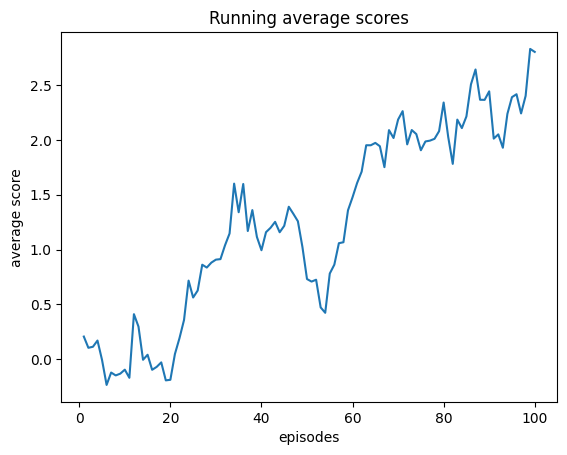

In [15]:
plt.plot(x, a)
plt.xlabel('episodes')
plt.ylabel("average score")
plt.title('Running average scores')
plt.show()

In [1]:
import gym
import numpy as np
from agent import Agent
import talib as ta
import tensorflow as tf
from datetime import datetime
from agent import Agent
import pandas as pd
import numpy as np
import gymnasium as gym
import datetime
import gym_trading_env
from gym_trading_env.downloader import download
from gym_trading_env.renderer import Renderer
import matplotlib.pyplot as plt
from src.stock_trading_env.single_stock_env import SingleStockTradingEnv
from stable_baselines3 import PPO

2023-08-29 06:25:08.747906: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-29 06:25:08.749998: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-29 06:25:08.792311: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-29 06:25:08.793257: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-29 06:25:09.557393: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
df = pd.read_csv("examples/data/AAPL.csv", parse_dates=["date"], index_col= "date")
df.sort_index(inplace= True)
df.dropna(inplace= True)
df.drop_duplicates(inplace=True)

# Generating features
# WARNING : the column names need to contain keyword 'feature' !
df["feature_close"] = df["close"].pct_change()
df["feature_open"] = df["open"]/df["close"]
df["feature_high"] = df["high"]/df["close"]
df["feature_low"] = df["low"]/df["close"]
# df["feature_volume"] = df["Volume USD"] / df["Volume USD"].rolling(7*24).max()
df.dropna(inplace= True)


In [51]:
import gymnasium as gym
env = gym.make(
        "single-stock-v0",
        name="BTCUSD",
        df=df,
        windows=1,
        positions=[0, 0.5, 1],  # From -1 (=SHORT), to +1 (=LONG)
        initial_position='random',  #Initial position
        trading_fees=0,  # 0.01% per stock buy / sell
        # borrow_interest_rate=0.0003/100,  #per timestep (= 1h here)
        # reward_function=reward_function,
        portfolio_initial_value=100000,  # in FIAT (here, USD)
        max_episode_duration=100,
        verbose=1
    )

In [52]:
N = 20
batch_size = 5
n_epochs = 4
alpha = 0.0003
# episodes = 300
score_history = []
learn_iters = 0
avg_score = 0
n_steps = 0


agent = Agent(n_actions=env.action_space.n, batch_size=batch_size,
                alpha=alpha, n_epochs=n_epochs,
                input_dims=env.observation_space.shape)

In [53]:
model = tf.keras.models.load_model("models/actor")

In [55]:
model.summary()

Model: "actor_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  1280      
                                                                 
 dense_1 (Dense)             multiple                  65792     
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense_2 (Dense)             multiple                  771       
                                                                 
Total params: 67843 (265.01 KB)
Trainable params: 67843 (265.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
score_history_pred = []
action_history = []
model = tf.keras.models.load_model("models/actor")
score_pred = 0
######predict########
observation, info = env.reset()
done = False
truncated = False
while not done and not truncated:
    
    state = tf.convert_to_tensor([observation])
    pred_action = model.predict(state)
    print(pred_action)
    action = np.argmax(pred_action)
    action_history.append(action)
    print(f"action : {action}")
    observation_, reward, done, truncated, info = env.step(action)
    observation = observation_
    n_steps += 1
    score_pred += reward

score_history_pred.append(score_pred)

print(score_history_pred)

1/1 [==============================] - 0s 65ms/step
[[2.3280305e-05 1.5504721e-04 9.9982172e-01]]
action : 2
1/1 [==============================] - 0s 19ms/step
[[2.2474305e-05 1.5077952e-04 9.9982673e-01]]
action : 2
1/1 [==============================] - 0s 18ms/step
[[2.2405158e-05 1.4993137e-04 9.9982762e-01]]
action : 2
1/1 [==============================] - 0s 18ms/step
[[2.2408185e-05 1.5030784e-04 9.9982733e-01]]
action : 2
1/1 [==============================] - 0s 18ms/step
[[2.3354118e-05 1.5559608e-04 9.9982113e-01]]
action : 2
1/1 [==============================] - 0s 19ms/step
[[2.3864421e-05 1.5944056e-04 9.9981672e-01]]
action : 2
1/1 [==============================] - 0s 18ms/step
[[2.6227266e-05 1.7218916e-04 9.9980158e-01]]
action : 2
1/1 [==============================] - 0s 17ms/step
[[2.1916672e-05 1.4775545e-04 9.9983025e-01]]
action : 2
1/1 [==============================] - 0s 18ms/step
[[2.1276341e-05 1.4402806e-04 9.9983466e-01]]
action : 2
1/1 [==============

In [46]:
print(action_history)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [37]:
pred_action = model.predict(state)
pred_action

1/1 [==============================] - 0s 20ms/step


array([[1.2588600e-04, 9.9908984e-01, 7.8428345e-04]], dtype=float32)

In [7]:
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=25000)
model.save("ppo_cartpole")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Market Return :  0.21%   |   Portfolio Return :  2.11%   |   
Market Return : -32.64%   |   Portfolio Return :  2.95%   |   
Market Return : -17.50%   |   Portfolio Return : 16.35%   |   
Market Return : -17.99%   |   Portfolio Return : -15.10%   |   
Market Return : -20.15%   |   Portfolio Return : -7.11%   |   
Market Return :  7.88%   |   Portfolio Return : -24.86%   |   
Market Return :  8.23%   |   Portfolio Return : 13.25%   |   
Market Return : -0.46%   |   Portfolio Return : -9.93%   |   
Market Return : -4.10%   |   Portfolio Return : 22.32%   |   
Market Return : 15.82%   |   Portfolio Return : 29.00%   |   
Market Return : 25.38%   |   Portfolio Return : -6.74%   |   
Market Return :  7.43%   |   Portfolio Return : 12.00%   |   
Market Return : 23.83%   |   Portfolio Return : 19.93%   |   
Market Return :  9.38%   |   Portfolio Return : 14.60%   |   
Market Return : -28.65%   |   Po

In [50]:
obs,info = env.reset()
model = PPO.load("ppo_cartpole")
done, truncated = False, False
while not done and not truncated:
    action, _states = model.predict(obs)
    observation_, reward, done, truncated, info = env.step(action)
    obs = observation_


Market Return : -67.93%   |   Portfolio Return : -62.27%   |   


In [40]:
obs,info = env.reset()


In [43]:
obs

array([[-0.01951314,  1.0099518 ,  1.0099518 ,  0.9651741 ]],
      dtype=float32)

In [39]:
obs[np.newaxis, ...]

array([[[[-0.01470491,  1.0149244 ,  1.0223866 ,  0.9925378 ]]]],
      dtype=float32)